<a href="https://colab.research.google.com/github/dxmai/CS114.L21.KHCL/blob/main/Hand_written_digits_recognition_Update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


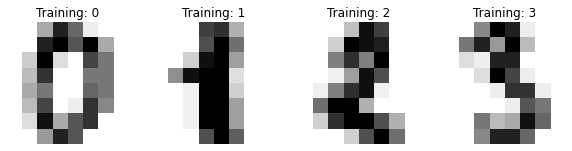

In [3]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [4]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

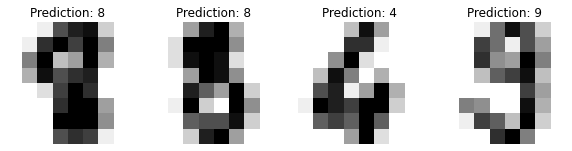

In [5]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [6]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


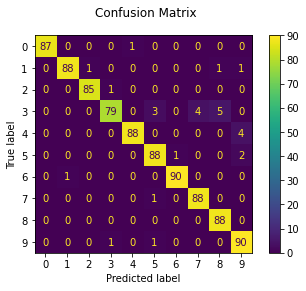

In [7]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

Code chụp webcam: Import từ Google Colab


In [8]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


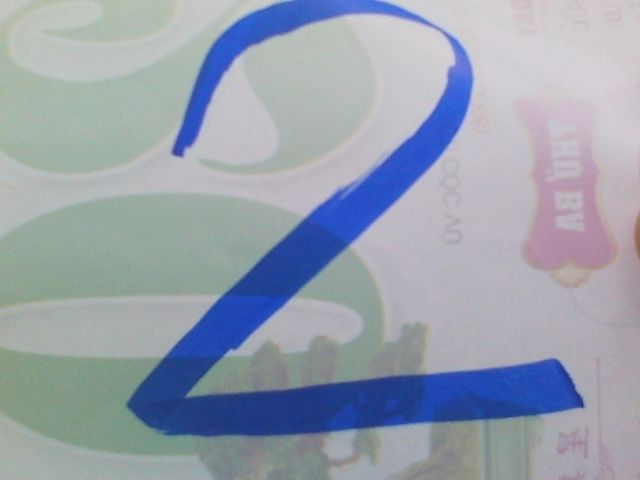

In [12]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Crop image: Cắt hình ảnh theo edge detection
Tham khảo tại: https://www.codeproject.com/Questions/5263477/How-do-I-crop-a-subimage-from-an-image-with-edge-d

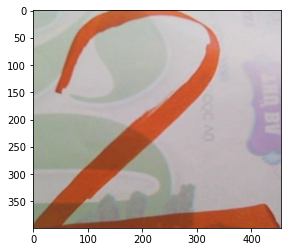

In [13]:
import cv2
import numpy as np
import matplotlib.image as mpimg #
#img = cv2.imread("test.png")
img = cv2.imread("photo.jpg")
blurred = cv2.blur(img,(8,8))
canny = cv2.Canny(blurred, 50, 200)

## find the non-zero min-max coords of canny
pts = np.argwhere(canny>0)
y1,x1 = pts.min(axis=0)
y2,x2 = pts.max(axis=0)

## crop the region
cropped = img[y1:y2, x1:x2]
cv2.imwrite("cropped.png", cropped)

tagged = cv2.rectangle(img.copy(), (x1,y1), (x2,y2), (0,255,0), 3, cv2.LINE_AA)

imgplot = plt.imshow(cropped)
plt.show()


Edge detection: Vì hình ảnh đưa vào rất lớn, nếu resize sẽ dẫn đến kết quả không như mong muốn nên dùng edge detection để thu gọn hình ảnh lại.
Tham khảo tại: https://docs.opencv.org/master/da/d22/tutorial_py_canny.html


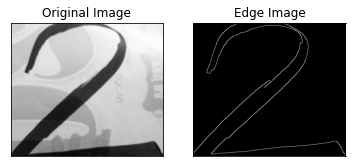

In [14]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('cropped.png',0)
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [15]:
import cv2
import numpy as np

img = cv2.resize(img, (8, 8), interpolation = cv2.INTER_AREA)


In [16]:
print(img)
print(img.size)

[[190 162 129 165 186 196 208 206]
 [180 143 185 187 196 166 205 207]
 [165 170 186 180 183 128 195 191]
 [181 182 182 171 110 173 189 175]
 [162 162 147  89 164 184 183 163]
 [159 145  78 136 174 181 180 168]
 [163  88 144 167 158 173 176 175]
 [ 87 106 117 108  99 108 101 106]]
64


Tham khảo cách chuyển dữ liệu về scale [0,1] của nhóm:
https://github.com/PhanTung-06/CS114.L21/tree/main/Recognizing_hand-written_digits

In [18]:
img = img/225*15
img = img.reshape(1, -1)
print(img)

[[0.84444444 0.72       0.57333333 0.73333333 0.82666667 0.87111111
  0.92444444 0.91555556 0.8        0.63555556 0.82222222 0.83111111
  0.87111111 0.73777778 0.91111111 0.92       0.73333333 0.75555556
  0.82666667 0.8        0.81333333 0.56888889 0.86666667 0.84888889
  0.80444444 0.80888889 0.80888889 0.76       0.48888889 0.76888889
  0.84       0.77777778 0.72       0.72       0.65333333 0.39555556
  0.72888889 0.81777778 0.81333333 0.72444444 0.70666667 0.64444444
  0.34666667 0.60444444 0.77333333 0.80444444 0.8        0.74666667
  0.72444444 0.39111111 0.64       0.74222222 0.70222222 0.76888889
  0.78222222 0.77777778 0.38666667 0.47111111 0.52       0.48
  0.44       0.48       0.44888889 0.47111111]]


In [19]:
print(clf.predict(img))
result = clf.predict(img)

[9]


Text(0.5, 1.0, 'Predict = 9')

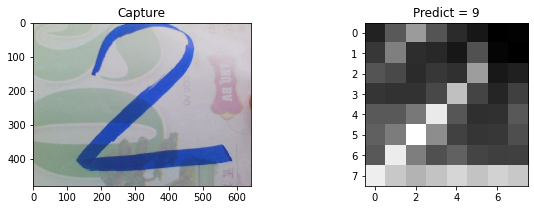

In [20]:
_, axes = plt.subplots(nrows=1, ncols=2 , figsize=(10, 3))
#for ax, image, label in zip(axes, img, result):
#ax.set_axis_off()
cap = axes[0]
cap_img = cv2.imread('photo.jpg')
cap.imshow(cv2.cvtColor(cap_img, cv2.COLOR_BGR2RGB), interpolation='nearest')
cap.set_title('Capture')

res = axes[1]
img = np.reshape(img, (8, 8))
res.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
res.set_title('Predict = %i' % result)

# Phân tích bài tập colab số 01


**Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?**

Chương trình chạy không tốt lắm.

**Ủa mà nhìn vào đâu để kết luận là tốt hay không?**

-Dựa vào tỉ lệ dự đoán chữ số, những trường hợp đoán sai còn khá nhiều.


**Nếu không tốt thì lý do tại sao?**

-Do bộ test không đủ để chương trình training.

-Do tác động bên ngoài(như ánh sáng, nét viết nhỏ hay lớn, đậm hay nhạt,....)

-Do anh trong bộ test khá nhỏ chỉ có 8*8, nhưng ảnh chụp từ webcam lại khá lớn. Nên trong quá trình chỉnh sửa ảnh làm mất mát thông tin của bức ảnh.

**Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?**

Theo em nếu tốt thì có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà. Vì chữ số trong biển số nhà được viết theo 1 kiểu, nên ta có thể dùng edge detection để nhận dạng cạnh của tất cả các chữ số trong biển số nhà, sau đó crop theo từng edge đã được phát hiện ra, xử lý trên từng hình ảnh đã crop rồi gom lại sẽ ra biển số nhà.
